## 1. 

#### Resample the dataset to daily intervals and calculate the maximum value for each day.

In [1]:
import pandas as pd

df = pd.read_csv("time_series_data.csv")
df.head()

,date,value
0,2022-01-01 00:00:00,0.897366
1,2022-01-01 01:00:00,0.389095
2,2022-01-01 02:00:00,0.849054
3,2022-01-01 03:00:00,0.526571
4,2022-01-01 04:00:00,0.403405


In [2]:
# Checking datatypes
df.dtypes

date      object
value    float64
dtype: object

In [3]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [4]:
# Convert date to datetime format
df_copy['date'] = pd.to_datetime(df_copy.date)

# Set date as index
df_copy.set_index('date', inplace=True)

In [5]:
day_max = df_copy.resample('D').max()
day_max

,value
date,
2022-01-01,0.966448
2022-01-02,0.922851


## 2. 

#### Create a line plot of the dataset, where the x-axis is the date and time, and the y-axis is the value.

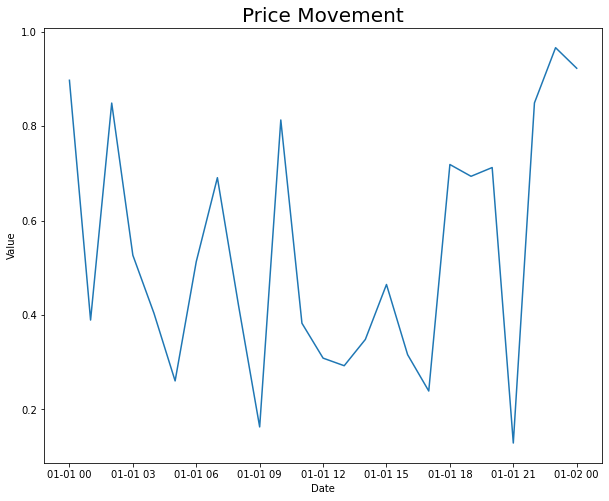

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df_copy.index, df_copy['value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("Price Movement", fontsize = 20)
plt.show()

## 3. 

#### Create a bar plot of the dataset, where the x-axis is the hour of the day (0-23), and the y-axis is the mean value for each hour.

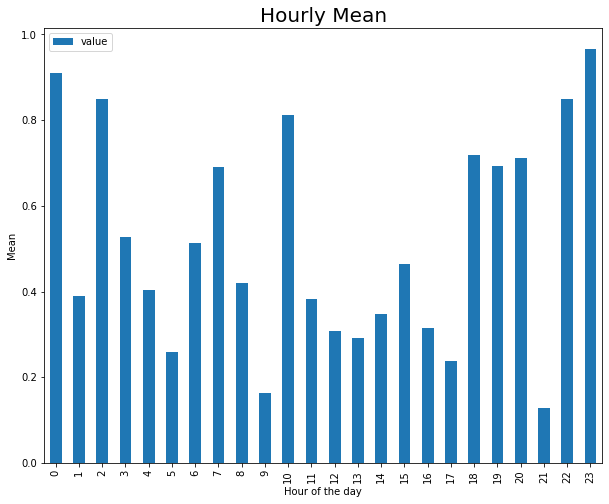

In [7]:
# Grouping data by index and calculationg mean
hour_mean = df_copy.groupby(df_copy.index.hour).mean()

hour_mean.plot(kind='bar',figsize=(10, 8))
plt.xlabel('Hour of the day')
plt.ylabel('Mean')
plt.title("Hourly Mean", fontsize = 20)
plt.show()

## 4. 

#### Calculate the rolling average of the dataset using a window size of 3, and plot the original values and the rolling average on the same plot.

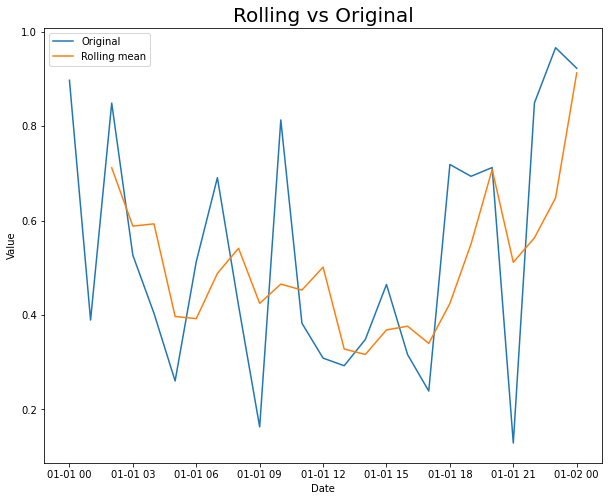

In [8]:
rolling_mean = df_copy.rolling(window=3).mean()

plt.figure(figsize=(10, 8))
plt.plot(df_copy.index, df_copy['value'], label='Original')
plt.plot(rolling_mean.index, rolling_mean['value'], label='Rolling mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("Rolling vs Original", fontsize = 20)
plt.legend()
plt.show()